PHASE 1: DATA COLLECTION AND EXPLORATORY DATA ANALYSIS

STEP 1: DATA IMPORT AND PREPROCESSING
----------------------------------------
✓ Dataset loaded successfully!
✓ Dataset shape: (200, 13)
✓ Columns: ['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)', 'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)', 'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)', 'GDP_Per_Capita (in USD)']

Missing values before preprocessing:
Series([], dtype: int64)

Total missing values: 0
✓ Missing values handled using median/mode imputation
✓ Missing values after preprocessing: 0

Data Transformation:
✓ Pollution indices normalized/scaled
✓ Country encoded: 175 unique countries
✓ Data transformation completed!

STEP 2: EXPLORATORY DATA ANALYSIS (EDA)

Descriptive Statistics for Key Numerical Features:
       CO2_Emissions (in MT)  Industrial_Waste (in tons

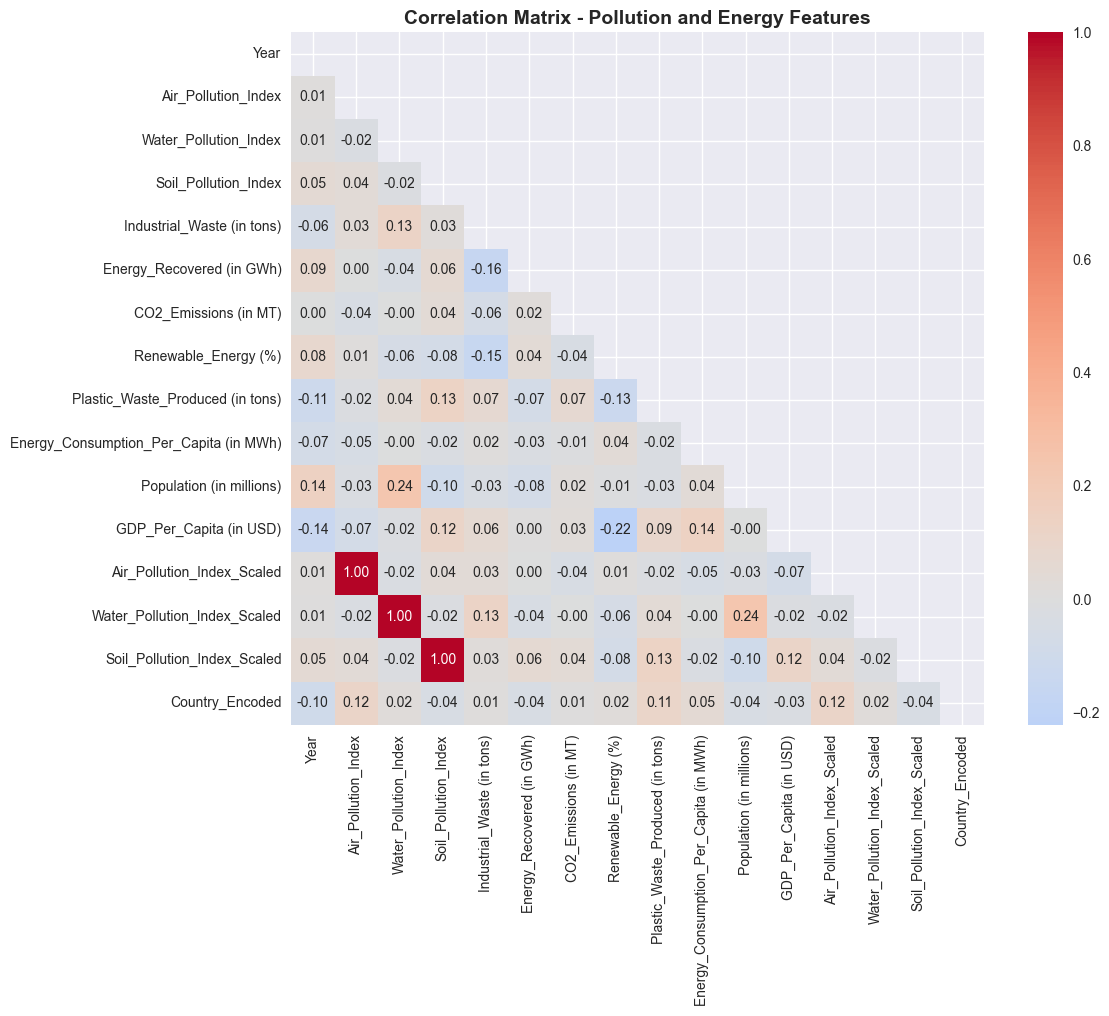

Strong correlations (|r| > 0.5):
  • Air_Pollution_Index ↔ Air_Pollution_Index_Scaled: 1.000
  • Water_Pollution_Index ↔ Water_Pollution_Index_Scaled: 1.000
  • Soil_Pollution_Index ↔ Soil_Pollution_Index_Scaled: 1.000

Creating comprehensive visualizations...


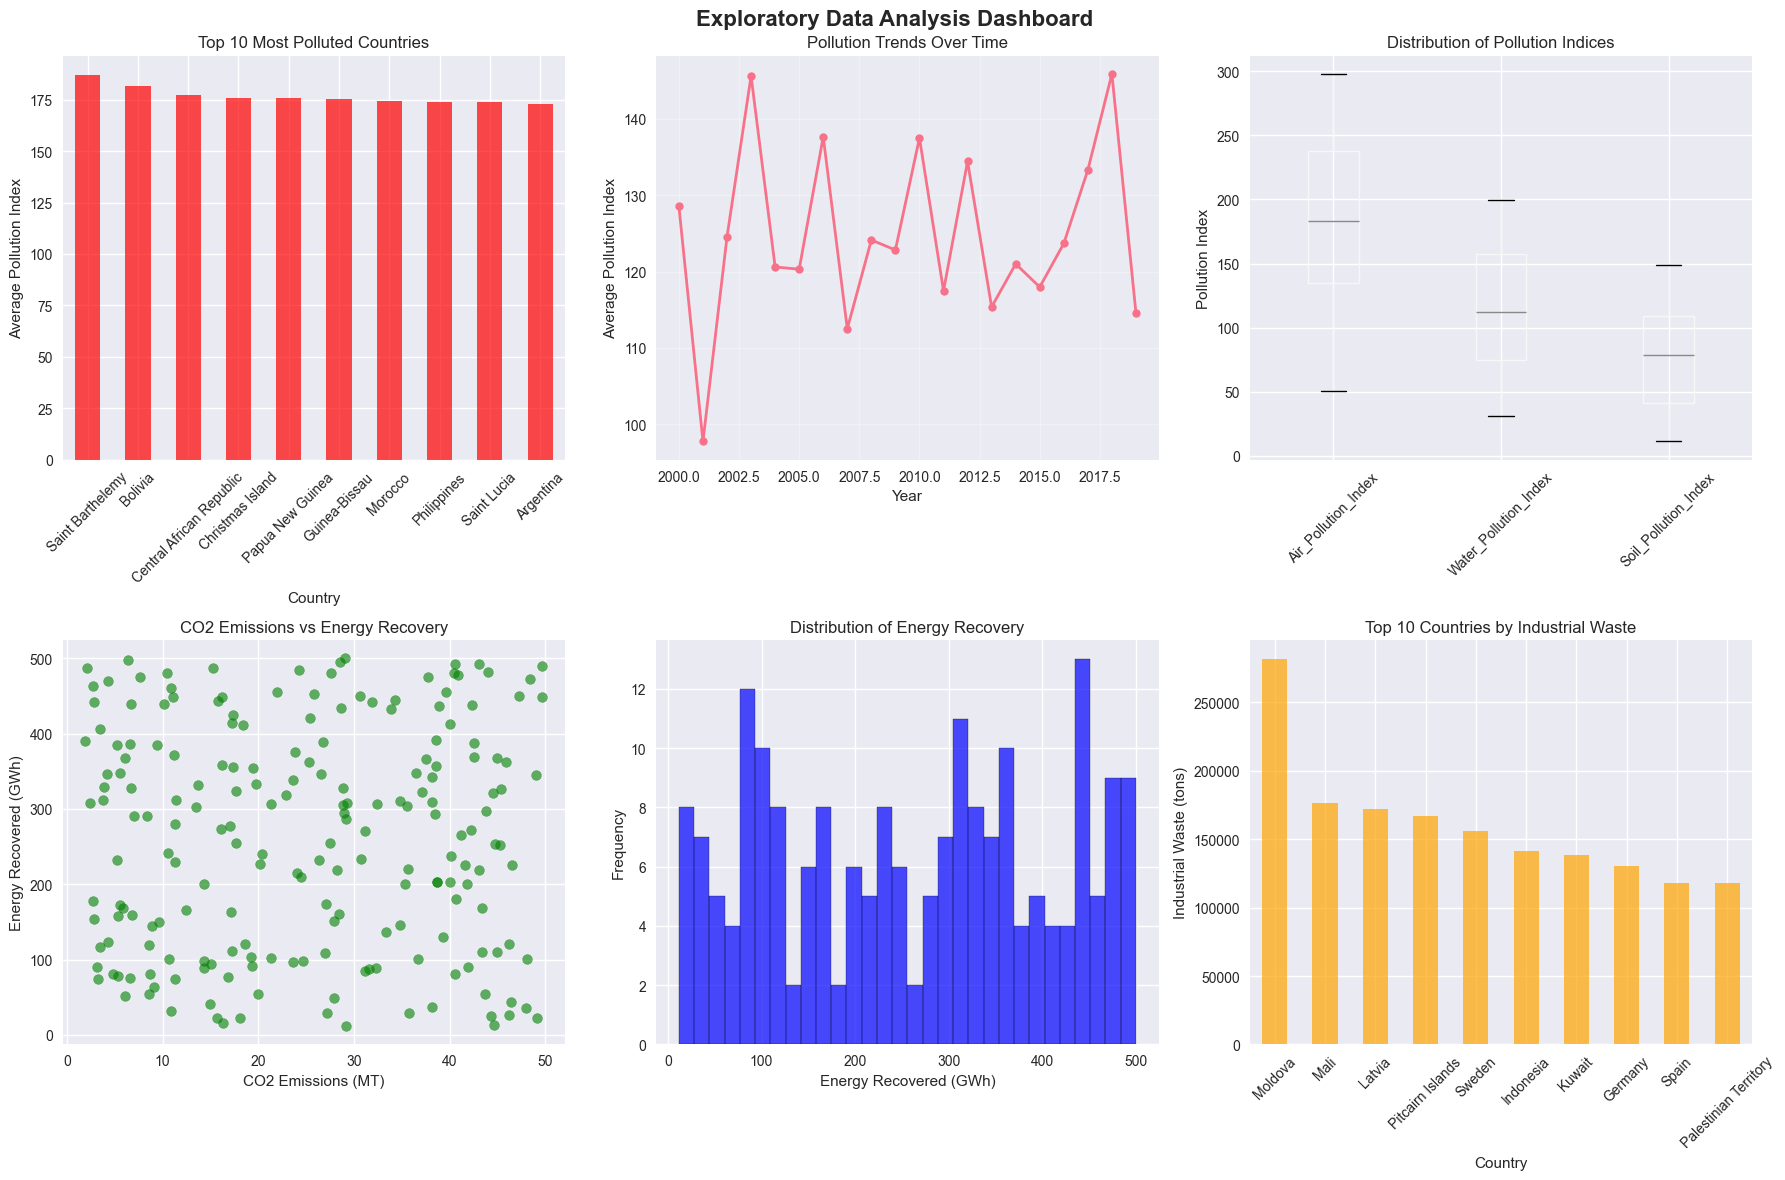


STEP 3: FEATURE ENGINEERING
Extracting yearly trends...
✓ Yearly pollution trends calculated
Calculating energy consumption per capita...
✓ Waste-to-Energy Ratio calculated
✓ Per capita metrics calculated using Energy_Consumption_Per_Capita (in MWh)
Creating additional derived features...
✓ Pollution severity categories created
✓ Energy efficiency categories created
✓ Environmental Impact Score calculated

✅ PHASE 1 COMPLETED SUCCESSFULLY!
✅ Final dataset shape: (200, 25)
✅ Total features created: 25
✅ New features created: ['Energy_Consumption_Per_Capita (in MWh)', 'GDP_Per_Capita (in USD)', 'Air_Pollution_Index_Scaled', 'Water_Pollution_Index_Scaled', 'Soil_Pollution_Index_Scaled', 'Pollution_Trend', 'Waste_to_Energy_Ratio', 'CO2_per_Capita', 'Energy_per_Capita', 'Pollution_Severity', 'Energy_Efficiency', 'Environmental_Impact_Score']
✅ Processed dataset saved as 'Global_Pollution_Analysis_Processed.csv'

🚀 Ready for Phase 2: Predictive Modeling!


In [12]:
# PHASE 1: DATA COLLECTION AND EXPLORATORY DATA ANALYSIS (EDA)
# Steps 1-3: Data Import, Preprocessing, EDA, and Feature Engineering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=" * 60)
print("PHASE 1: DATA COLLECTION AND EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# STEP 1: DATA IMPORT AND PREPROCESSING
print("\nSTEP 1: DATA IMPORT AND PREPROCESSING")
print("-" * 40)

# 1. Load Dataset
df = pd.read_csv('Global_Pollution_Analysis.csv')
print(f"✓ Dataset loaded successfully!")
print(f"✓ Dataset shape: {df.shape}")
print(f"✓ Columns: {list(df.columns)}")

# 2. Handle Missing Values
print(f"\nMissing values before preprocessing:")
missing_before = df.isnull().sum()
print(missing_before[missing_before > 0])

# Identify missing or inconsistent data
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Handle missing values using appropriate imputation strategies
# For numerical columns: use median imputation
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# For categorical columns: use mode imputation
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')

print(f"✓ Missing values handled using median/mode imputation")
print(f"✓ Missing values after preprocessing: {df.isnull().sum().sum()}")

# 3. Data Transformation
print(f"\nData Transformation:")

# Normalize/scale pollution indices
pollution_indices = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
scaler = StandardScaler()

# Create scaled versions (keeping originals for interpretation)
for col in pollution_indices:
    if col in df.columns:
        df[f'{col}_Scaled'] = scaler.fit_transform(df[[col]])

print(f"✓ Pollution indices normalized/scaled")

# Encode categorical features
# Label encoding for Country (if needed for modeling)
if 'Country' in df.columns:
    le_country = LabelEncoder()
    df['Country_Encoded'] = le_country.fit_transform(df['Country'])
    print(f"✓ Country encoded: {len(le_country.classes_)} unique countries")

# One-hot encoding for Year (if it's categorical)
if 'Year' in df.columns and df['Year'].dtype == 'object':
    year_dummies = pd.get_dummies(df['Year'], prefix='Year')
    df = pd.concat([df, year_dummies], axis=1)
    print(f"✓ Year one-hot encoded")

print(f"✓ Data transformation completed!")

# STEP 2: EXPLORATORY DATA ANALYSIS (EDA)
print("\n" + "=" * 40)
print("STEP 2: EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 40)

# 1. Descriptive Statistics
print("\nDescriptive Statistics for Key Numerical Features:")
key_features = ['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)',
                'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']

# Filter existing columns
existing_features = [col for col in key_features if col in df.columns]
desc_stats = df[existing_features].describe()
print(desc_stats.round(2))

# 2. Correlation Analysis
print(f"\nCorrelation Analysis:")
# Create correlation matrix for numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_features].corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            mask=mask, square=True, fmt='.2f')
plt.title('Correlation Matrix - Pollution and Energy Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print strong correlations
print("Strong correlations (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            print(f"  • {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_val:.3f}")

# 3. Visualizations
print(f"\nCreating comprehensive visualizations...")

# Create a comprehensive EDA dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Exploratory Data Analysis Dashboard', fontsize=16, fontweight='bold')

# Bar chart: Top 10 countries by total pollution
if 'Country' in df.columns:
    # Create total pollution index for analysis
    pollution_cols = [col for col in ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index'] if col in df.columns]
    if pollution_cols:
        df['Total_Pollution_Index'] = df[pollution_cols].mean(axis=1)
        top_polluted = df.groupby('Country')['Total_Pollution_Index'].mean().sort_values(ascending=False).head(10)
        top_polluted.plot(kind='bar', ax=axes[0, 0], color='red', alpha=0.7)
        axes[0, 0].set_title('Top 10 Most Polluted Countries')
        axes[0, 0].set_ylabel('Average Pollution Index')
        axes[0, 0].tick_params(axis='x', rotation=45)

# Line plot: Pollution trends over time (if Year column exists)
if 'Year' in df.columns and df['Year'].dtype in ['int64', 'float64']:
    yearly_pollution = df.groupby('Year')['Total_Pollution_Index'].mean()
    axes[0, 1].plot(yearly_pollution.index, yearly_pollution.values, marker='o', linewidth=2, markersize=6)
    axes[0, 1].set_title('Pollution Trends Over Time')
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel('Average Pollution Index')
    axes[0, 1].grid(True, alpha=0.3)

# Box plot: Distribution of pollution indices
if pollution_cols:
    df[pollution_cols].boxplot(ax=axes[0, 2])
    axes[0, 2].set_title('Distribution of Pollution Indices')
    axes[0, 2].set_ylabel('Pollution Index')
    axes[0, 2].tick_params(axis='x', rotation=45)

# Scatter plot: CO2 vs Energy Recovery
if 'CO2_Emissions (in MT)' in df.columns and 'Energy_Recovered (in GWh)' in df.columns:
    axes[1, 0].scatter(df['CO2_Emissions (in MT)'], df['Energy_Recovered (in GWh)'], 
                       alpha=0.6, c='green', s=50)
    axes[1, 0].set_xlabel('CO2 Emissions (MT)')
    axes[1, 0].set_ylabel('Energy Recovered (GWh)')
    axes[1, 0].set_title('CO2 Emissions vs Energy Recovery')

# Histogram: Energy recovery distribution
if 'Energy_Recovered (in GWh)' in df.columns:
    axes[1, 1].hist(df['Energy_Recovered (in GWh)'], bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[1, 1].set_title('Distribution of Energy Recovery')
    axes[1, 1].set_xlabel('Energy Recovered (GWh)')
    axes[1, 1].set_ylabel('Frequency')

# Bar chart: Industrial waste by top countries
if 'Industrial_Waste (in tons)' in df.columns and 'Country' in df.columns:
    top_waste = df.groupby('Country')['Industrial_Waste (in tons)'].sum().sort_values(ascending=False).head(10)
    top_waste.plot(kind='bar', ax=axes[1, 2], color='orange', alpha=0.7)
    axes[1, 2].set_title('Top 10 Countries by Industrial Waste')
    axes[1, 2].set_ylabel('Industrial Waste (tons)')
    axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# STEP 3: FEATURE ENGINEERING
print("\n" + "=" * 40)
print("STEP 3: FEATURE ENGINEERING")
print("=" * 40)

# 1. Yearly Trends (if Year column exists)
if 'Year' in df.columns:
    print("Extracting yearly trends...")
    
    # Calculate year-over-year changes
    if df['Year'].dtype in ['int64', 'float64']:
        df_sorted = df.sort_values('Year')
        
        # Calculate pollution trend per country
        for country in df['Country'].unique():
            country_data = df[df['Country'] == country].sort_values('Year')
            if len(country_data) > 1:
                # Calculate trend (simple slope)
                years = country_data['Year'].values
                pollution = country_data['Total_Pollution_Index'].values
                if len(years) > 1:
                    trend = np.polyfit(years, pollution, 1)[0]  # Slope of linear fit
                    df.loc[df['Country'] == country, 'Pollution_Trend'] = trend
    
    print("✓ Yearly pollution trends calculated")

# 2. Energy Consumption per Capita
print("Calculating energy consumption per capita...")

# Create energy efficiency metrics
if 'Energy_Recovered (in GWh)' in df.columns and 'Industrial_Waste (in tons)' in df.columns:
    # Waste-to-Energy Ratio
    df['Waste_to_Energy_Ratio'] = df['Energy_Recovered (in GWh)'] / (df['Industrial_Waste (in tons)'] + 1)
    print("✓ Waste-to-Energy Ratio calculated")

# If population data exists, calculate per capita metrics
population_col = [col for col in df.columns if 'population' in col.lower() or 'capita' in col.lower()]
if population_col:
    pop_col = population_col[0]
    df['CO2_per_Capita'] = df['CO2_Emissions (in MT)'] / (df[pop_col] + 1)
    df['Energy_per_Capita'] = df['Energy_Recovered (in GWh)'] / (df[pop_col] + 1)
    print(f"✓ Per capita metrics calculated using {pop_col}")
else:
    print("ℹ️  Population data not found - per capita calculations skipped")

# 3. Additional derived features
print("Creating additional derived features...")

# Pollution severity categories
if 'Total_Pollution_Index' in df.columns:
    df['Pollution_Severity'] = pd.cut(df['Total_Pollution_Index'], 
                                     bins=3, 
                                     labels=['Low', 'Medium', 'High'])
    print("✓ Pollution severity categories created")

# Energy efficiency categories
if 'Waste_to_Energy_Ratio' in df.columns:
    df['Energy_Efficiency'] = pd.cut(df['Waste_to_Energy_Ratio'], 
                                    bins=3, 
                                    labels=['Low_Efficiency', 'Medium_Efficiency', 'High_Efficiency'])
    print("✓ Energy efficiency categories created")

# Environmental impact score (composite metric)
impact_features = []
for col in ['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)', 'Total_Pollution_Index']:
    if col in df.columns:
        impact_features.append(col)

if len(impact_features) >= 2:
    # Normalize and combine for environmental impact score
    scaler_impact = StandardScaler()
    impact_scaled = scaler_impact.fit_transform(df[impact_features])
    df['Environmental_Impact_Score'] = np.mean(impact_scaled, axis=1)
    print("✓ Environmental Impact Score calculated")

print(f"\n✅ PHASE 1 COMPLETED SUCCESSFULLY!")
print(f"✅ Final dataset shape: {df.shape}")
print(f"✅ Total features created: {len(df.columns)}")

# Display summary of new features
new_features = [col for col in df.columns if any(keyword in col.lower() 
                for keyword in ['ratio', 'trend', 'capita', 'severity', 'efficiency', 'impact', 'scaled'])]
if new_features:
    print(f"✅ New features created: {new_features}")

# Save processed dataset for next phases
df.to_csv('Global_Pollution_Analysis_Processed.csv', index=False)
print(f"✅ Processed dataset saved as 'Global_Pollution_Analysis_Processed.csv'")

print("\n🚀 Ready for Phase 2: Predictive Modeling!")

PHASE 2: PREDICTIVE MODELING
✓ Processed dataset loaded from Phase 1
✓ Dataset shape: (200, 25)

STEP 4: LINEAR REGRESSION MODEL
Objective: Predict energy recovery based on pollution levels

1. MODEL SETUP:
   Target Variable: Energy Recovery (in GWh)
   Features: Air_Pollution_Index, CO2_Emissions, Industrial_Waste
   Available features: ['Air_Pollution_Index', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']
   Final dataset shape: (200, 3)

2. MODEL BUILDING:
   Training set: (160, 3)
   Test set: (40, 3)
✓ Linear Regression model trained successfully

3. LINEAR REGRESSION EVALUATION:
   R² Score: -0.0252
   Mean Squared Error (MSE): 24792.81
   Root Mean Squared Error (RMSE): 157.46
   Mean Absolute Error (MAE): 142.11

   Feature Coefficients:
     • Air_Pollution_Index: -8.6928
     • CO2_Emissions (in MT): -4.0533
     • Industrial_Waste (in tons): -19.8135
     • Intercept: 265.7303

   COMPARISON WITH RANDOM FOREST:
   Random Forest R²: -0.0799
   Random Forest RMSE: 161

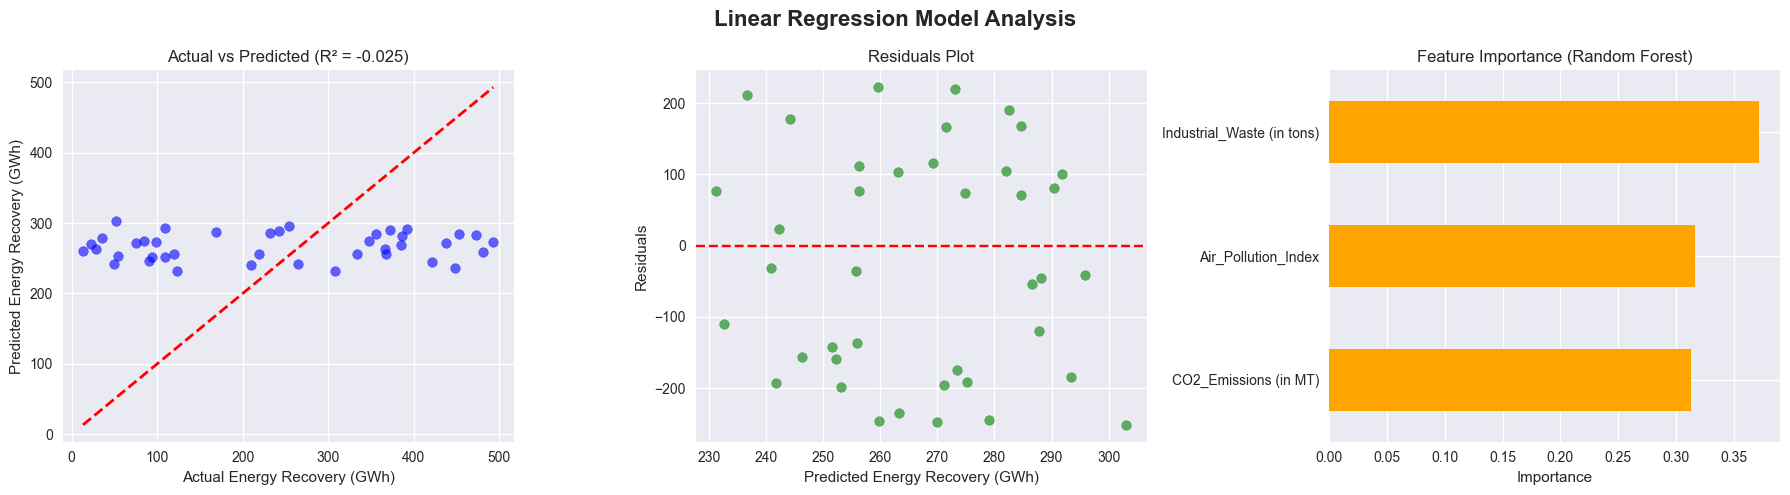


STEP 5: LOGISTIC REGRESSION MODEL
Objective: Classify countries by pollution severity

1. MODEL SETUP:
   Target: Pollution Severity Categories (Low, Medium, High)
   Features: CO2_Emissions, Industrial_Waste, Plastic_Waste
   Available features: ['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)', 'Plastic_Waste_Produced (in tons)']
   Final dataset shape: (200, 3)
   Class distribution: {'Low': 67, 'High': 67, 'Medium': 66}

2. MODEL BUILDING:
   Training set: (160, 3)
   Test set: (40, 3)
✓ Logistic Regression model trained successfully

3. LOGISTIC REGRESSION EVALUATION:
   Accuracy: 0.2750
   Precision (weighted): 0.2650
   Recall (weighted): 0.2750
   F1-score (weighted): 0.2673

   DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

        High       0.20      0.14      0.17        14
         Low       0.40      0.46      0.43        13
      Medium       0.20      0.23      0.21        13

    accuracy                           0.28     

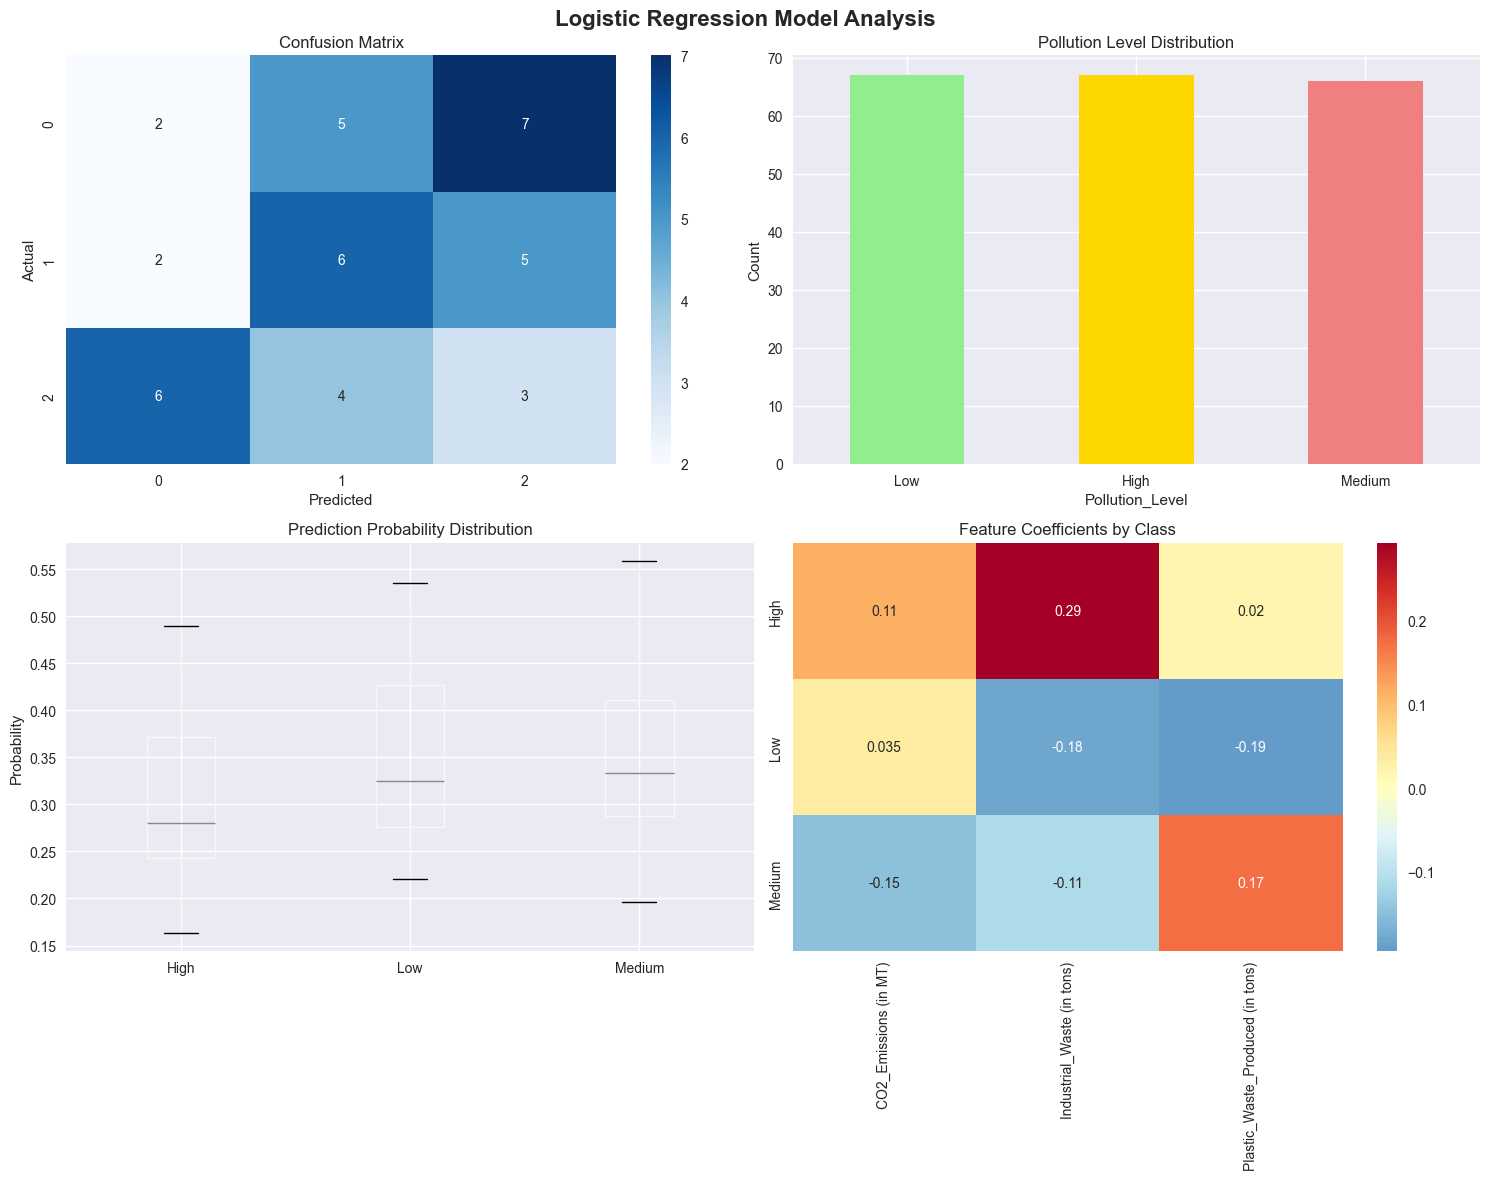


PHASE 2 SUMMARY

📊 LINEAR REGRESSION RESULTS:
   • Model Performance: R² = -0.0252
   • Prediction Error: RMSE = 157.46
   • Best predictor: Industrial_Waste (in tons)

🎯 LOGISTIC REGRESSION RESULTS:
   • Classification Accuracy: 0.2750
   • Overall F1-Score: 0.2673
   • Best performing class: Low

✅ PHASE 2 COMPLETED SUCCESSFULLY!
✅ Both regression and classification models trained
✅ Model evaluation metrics calculated
✅ Visualization dashboards created
✅ Enhanced dataset with predictions saved

🚀 Ready for Phase 3: Reporting and Insights!


In [13]:
# PHASE 2: PREDICTIVE MODELING
# Steps 4-5: Linear Regression and Logistic Regression Models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor  # Added for comparison
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                           accuracy_score, precision_score, recall_score, f1_score,
                           confusion_matrix, classification_report)
import warnings
warnings.filterwarnings('ignore')

print("=" * 60)
print("PHASE 2: PREDICTIVE MODELING")
print("=" * 60)

# Load processed data from Phase 1
try:
    df = pd.read_csv('Global_Pollution_Analysis_Processed.csv')
    print("✓ Processed dataset loaded from Phase 1")
except:
    # If processed file doesn't exist, load original and do basic preprocessing
    df = pd.read_csv('Global_Pollution_Analysis.csv')
    df.fillna(df.median(numeric_only=True), inplace=True)
    df['Total_Pollution_Index'] = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].mean(axis=1)
    df['Waste_to_Energy_Ratio'] = df['Energy_Recovered (in GWh)'] / (df['Industrial_Waste (in tons)'] + 1)
    print("✓ Basic preprocessing applied to original dataset")

print(f"✓ Dataset shape: {df.shape}")

# STEP 4: LINEAR REGRESSION MODEL (FOR POLLUTION PREDICTION)
print("\n" + "=" * 50)
print("STEP 4: LINEAR REGRESSION MODEL")
print("Objective: Predict energy recovery based on pollution levels")
print("=" * 50)

# 1. Model Objective and Setup
print("\n1. MODEL SETUP:")
print("   Target Variable: Energy Recovery (in GWh)")
print("   Features: Air_Pollution_Index, CO2_Emissions, Industrial_Waste")

# Prepare features and target for Linear Regression
feature_cols = ['Air_Pollution_Index', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']
target_col = 'Energy_Recovered (in GWh)'

# Check if all required columns exist
existing_features = [col for col in feature_cols if col in df.columns]
if target_col not in df.columns:
    print(f"❌ Target column '{target_col}' not found!")
    exit()

print(f"   Available features: {existing_features}")

# Prepare data
X_reg = df[existing_features].copy()
y_reg = df[target_col].copy()

# Remove any remaining NaN values
mask = ~(X_reg.isnull().any(axis=1) | y_reg.isnull())
X_reg = X_reg[mask]
y_reg = y_reg[mask]

print(f"   Final dataset shape: {X_reg.shape}")

# 2. Model Building
print("\n2. MODEL BUILDING:")

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

print(f"   Training set: {X_train_reg.shape}")
print(f"   Test set: {X_test_reg.shape}")

# Scale features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_reg_scaled, y_train_reg)

# Make predictions
y_pred_lr = lr_model.predict(X_test_reg_scaled)

print("✓ Linear Regression model trained successfully")

# 3. Evaluation Metrics
print("\n3. LINEAR REGRESSION EVALUATION:")

# Calculate metrics
lr_r2 = r2_score(y_test_reg, y_pred_lr)
lr_mse = mean_squared_error(y_test_reg, y_pred_lr)
lr_mae = mean_absolute_error(y_test_reg, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)

print(f"   R² Score: {lr_r2:.4f}")
print(f"   Mean Squared Error (MSE): {lr_mse:.2f}")
print(f"   Root Mean Squared Error (RMSE): {lr_rmse:.2f}")
print(f"   Mean Absolute Error (MAE): {lr_mae:.2f}")

# Feature coefficients
print(f"\n   Feature Coefficients:")
for feature, coef in zip(existing_features, lr_model.coef_):
    print(f"     • {feature}: {coef:.4f}")
print(f"     • Intercept: {lr_model.intercept_:.4f}")

# Train Random Forest for comparison
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_reg_scaled, y_train_reg)
y_pred_rf = rf_model.predict(X_test_reg_scaled)

rf_r2 = r2_score(y_test_reg, y_pred_rf)
rf_mse = mean_squared_error(y_test_reg, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)

print(f"\n   COMPARISON WITH RANDOM FOREST:")
print(f"   Random Forest R²: {rf_r2:.4f}")
print(f"   Random Forest RMSE: {rf_rmse:.2f}")

# Visualization for Linear Regression
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Linear Regression Model Analysis', fontsize=16, fontweight='bold')

# Actual vs Predicted
axes[0].scatter(y_test_reg, y_pred_lr, alpha=0.6, color='blue')
axes[0].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Energy Recovery (GWh)')
axes[0].set_ylabel('Predicted Energy Recovery (GWh)')
axes[0].set_title(f'Actual vs Predicted (R² = {lr_r2:.3f})')

# Residuals plot
residuals = y_test_reg - y_pred_lr
axes[1].scatter(y_pred_lr, residuals, alpha=0.6, color='green')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Energy Recovery (GWh)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals Plot')

# Feature importance (using Random Forest for comparison)
feature_importance = pd.Series(rf_model.feature_importances_, index=existing_features)
feature_importance.sort_values().plot(kind='barh', ax=axes[2], color='orange')
axes[2].set_title('Feature Importance (Random Forest)')
axes[2].set_xlabel('Importance')

plt.tight_layout()
plt.show()

# STEP 5: LOGISTIC REGRESSION MODEL (FOR CATEGORIZATION)
print("\n" + "=" * 50)
print("STEP 5: LOGISTIC REGRESSION MODEL")
print("Objective: Classify countries by pollution severity")
print("=" * 50)

# 1. Model Objective and Setup
print("\n1. MODEL SETUP:")
print("   Target: Pollution Severity Categories (Low, Medium, High)")
print("   Features: CO2_Emissions, Industrial_Waste, Plastic_Waste")

# Create pollution level categories if not exists
if 'Total_Pollution_Index' not in df.columns:
    pollution_cols = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
    available_pollution_cols = [col for col in pollution_cols if col in df.columns]
    df['Total_Pollution_Index'] = df[available_pollution_cols].mean(axis=1)

# Create pollution severity categories
df['Pollution_Level'] = pd.qcut(df['Total_Pollution_Index'], q=3, labels=['Low', 'Medium', 'High'])

# Prepare features for classification
clf_feature_cols = ['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']
if 'Plastic_Waste_Produced (in tons)' in df.columns:
    clf_feature_cols.append('Plastic_Waste_Produced (in tons)')

existing_clf_features = [col for col in clf_feature_cols if col in df.columns]
print(f"   Available features: {existing_clf_features}")

# Prepare classification data
X_clf = df[existing_clf_features].copy()
y_clf = df['Pollution_Level'].copy()

# Remove NaN values
mask_clf = ~(X_clf.isnull().any(axis=1) | y_clf.isnull())
X_clf = X_clf[mask_clf]
y_clf = y_clf[mask_clf]

print(f"   Final dataset shape: {X_clf.shape}")
print(f"   Class distribution: {y_clf.value_counts().to_dict()}")

# 2. Model Implementation
print("\n2. MODEL BUILDING:")

# Split data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

print(f"   Training set: {X_train_clf.shape}")
print(f"   Test set: {X_test_clf.shape}")

# Scale features
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

# Train Logistic Regression
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=1000)
log_reg_model.fit(X_train_clf_scaled, y_train_clf)

# Make predictions
y_pred_clf = log_reg_model.predict(X_test_clf_scaled)
y_pred_proba = log_reg_model.predict_proba(X_test_clf_scaled)

print("✓ Logistic Regression model trained successfully")

# 3. Evaluation Metrics
print("\n3. LOGISTIC REGRESSION EVALUATION:")

# Calculate metrics
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')

print(f"   Accuracy: {accuracy:.4f}")
print(f"   Precision (weighted): {precision:.4f}")
print(f"   Recall (weighted): {recall:.4f}")
print(f"   F1-score (weighted): {f1:.4f}")

# Classification Report
print(f"\n   DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test_clf, y_pred_clf))

# Confusion Matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
print(f"\n   CONFUSION MATRIX:")
print(cm)

# Visualizations for Logistic Regression
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Logistic Regression Model Analysis', fontsize=16, fontweight='bold')

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# Class distribution
y_clf.value_counts().plot(kind='bar', ax=axes[0, 1], color=['lightgreen', 'gold', 'lightcoral'])
axes[0, 1].set_title('Pollution Level Distribution')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=0)

# Prediction probabilities
prob_df = pd.DataFrame(y_pred_proba, columns=log_reg_model.classes_)
prob_df.boxplot(ax=axes[1, 0])
axes[1, 0].set_title('Prediction Probability Distribution')
axes[1, 0].set_ylabel('Probability')

# Model coefficients heatmap
coef_df = pd.DataFrame(log_reg_model.coef_, 
                      columns=existing_clf_features,
                      index=log_reg_model.classes_)
sns.heatmap(coef_df, annot=True, cmap='RdYlBu_r', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Feature Coefficients by Class')

plt.tight_layout()
plt.show()

# PHASE 2 SUMMARY
print("\n" + "=" * 60)
print("PHASE 2 SUMMARY")
print("=" * 60)

print(f"\n📊 LINEAR REGRESSION RESULTS:")
print(f"   • Model Performance: R² = {lr_r2:.4f}")
print(f"   • Prediction Error: RMSE = {lr_rmse:.2f}")
print(f"   • Best predictor: {existing_features[np.argmax(np.abs(lr_model.coef_))]}")

print(f"\n🎯 LOGISTIC REGRESSION RESULTS:")
print(f"   • Classification Accuracy: {accuracy:.4f}")
print(f"   • Overall F1-Score: {f1:.4f}")
print(f"   • Best performing class: {y_clf.value_counts().index[0]}")

print(f"\n✅ PHASE 2 COMPLETED SUCCESSFULLY!")
print(f"✅ Both regression and classification models trained")
print(f"✅ Model evaluation metrics calculated")
print(f"✅ Visualization dashboards created")

# Save model results for Phase 3
results_dict = {
    'linear_regression': {
        'r2_score': lr_r2,
        'mse': lr_mse,
        'rmse': lr_rmse,
        'mae': lr_mae
    },
    'random_forest': {
        'r2_score': rf_r2,
        'mse': rf_mse,
        'rmse': rf_rmse
    },
    'logistic_regression': {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
}

# Save enhanced dataset with predictions for Phase 3
df_enhanced = df.copy()
# Add predictions for the full dataset (for analysis purposes)
X_full_scaled = scaler_reg.transform(df[existing_features].fillna(df[existing_features].median()))
df_enhanced['Predicted_Energy_Recovery'] = lr_model.predict(X_full_scaled)

X_clf_full_scaled = scaler_clf.transform(df[existing_clf_features].fillna(df[existing_clf_features].median()))
df_enhanced['Predicted_Pollution_Level'] = log_reg_model.predict(X_clf_full_scaled)

df_enhanced.to_csv('Global_Pollution_Analysis_With_Predictions.csv', index=False)
print(f"✅ Enhanced dataset with predictions saved")

print("\n🚀 Ready for Phase 3: Reporting and Insights!")

🔷 Linear Regression Performance:
R² Score: -0.0252
MSE: 24792.8105
MAE: 142.1050


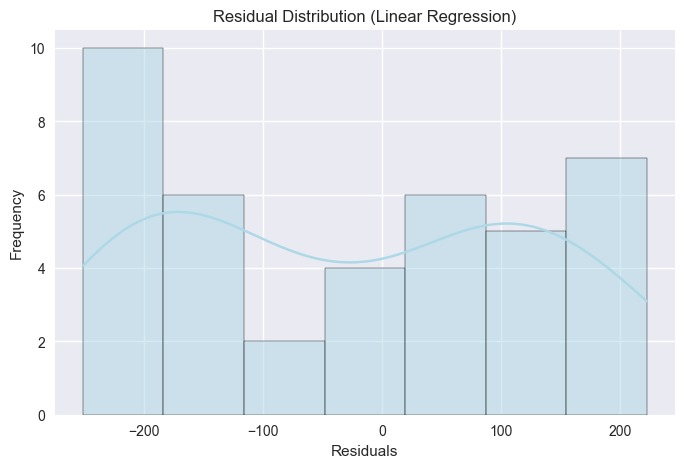

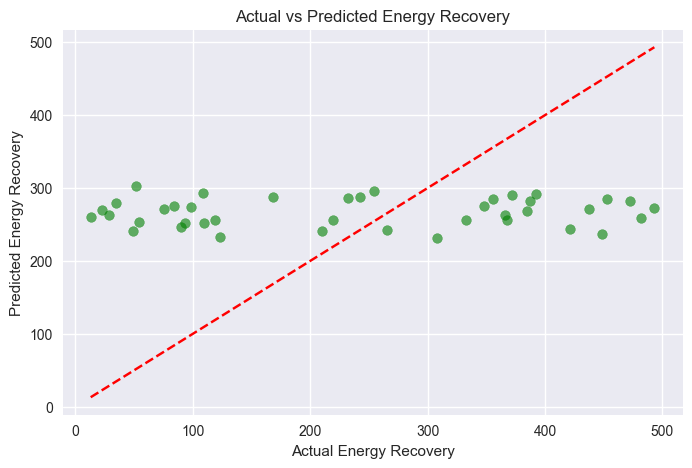


🔶 Logistic Regression Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        38
      Medium       1.00      1.00      1.00         2

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



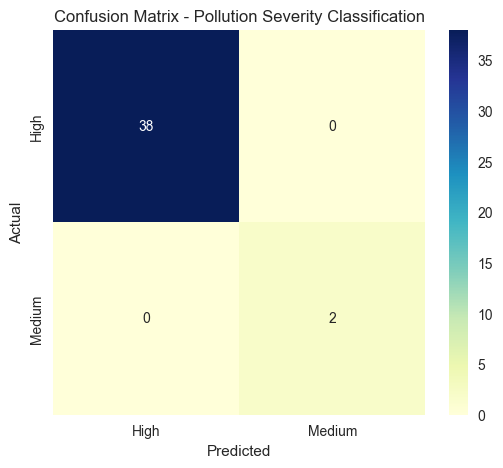

In [18]:
# 📦 Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')


# Assuming X and y are already defined from previous cells
# X = df with selected features like Air_Pollution_Index, CO2_Emissions, etc.
# y = target feature like Energy_Recovery

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluation metrics
print("🔷 Linear Regression Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color="lightblue")
plt.title("Residual Distribution (Linear Regression)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# Actual vs predicted plot
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color="green", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Energy Recovery")
plt.ylabel("Predicted Energy Recovery")
plt.title("Actual vs Predicted Energy Recovery")
plt.grid(True)
plt.show()


# Creating labels for pollution severity
# e.g. 0 = Low, 1 = Medium, 2 = High based on Air_Pollution_Index
def categorize_pollution(val):
    if val < 40:
        return "Low"
    elif val < 70:
        return "Medium"
    else:
        return "High"

df['Pollution_Level'] = df['Air_Pollution_Index'].apply(categorize_pollution)

# Features and label
features_cls = ['Air_Pollution_Index', 'CO2_Emissions (in MT)']
X_cls = df[features_cls]
y_cls = df['Pollution_Level']

# Train-test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Train logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_cls, y_train_cls)

# Predictions
y_pred_cls = log_reg.predict(X_test_cls)

# Evaluation
print("\n🔶 Logistic Regression Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))


# Confusion Matrix
cm = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title("Confusion Matrix - Pollution Severity Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
